In [4]:
import pandas as pd
import numpy as np
from random import randrange, uniform
from sklearn import linear_model

/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:1085: UserWarning: Duplicate key in file "/Users/Pani/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [5]:
import os
files = os.listdir('we_data/')
print(files)

['.DS_Store', 'Group_xx.csv', 'test.csv', 'train.csv', 'validation.csv']


In [6]:

train = pd.read_csv('we_data/train.csv')
test = pd.read_csv('we_data/test.csv')
validation = pd.read_csv('we_data/validation.csv')

In [7]:
# list(train)

# #Number of training points
# num_train_data = train.count()
# print("Number of training data ", num_train_data)

# #Number of features
# num_fut = len(list(train))
# print("number of features", num_fut)


# # ad_group = train.groupby('advertiser')
# # ad_group['advertiser'].describe()

# advertisers = train['advertiser'].unique()
# advertisers.sort()
# advertisers

In [8]:
train.count()

click             2430981
weekday           2430981
hour              2430981
bidid             2430981
userid            2430981
useragent         2430981
IP                2430981
region            2430981
city              2430981
adexchange        2430981
domain            2430981
url               2430981
urlid             2430981
slotid            2430981
slotwidth         2430981
slotheight        2430981
slotvisibility    2430981
slotformat        2430981
slotprice         2430981
creative          2430981
bidprice          2430981
payprice          2430981
keypage           2430981
advertiser        2430981
usertag           2430981
dtype: int64

In [9]:
# validation.count()

In [10]:
# test.count()

In [11]:
 train.loc[train['click']==1].index

Int64Index([   1104,    4949,    8878,    9790,   10000,   11683,   12733,
              13025,   13783,   14405,
            ...
            2415833, 2415911, 2416561, 2417205, 2418891, 2419465, 2422126,
            2422921, 2425243, 2428854],
           dtype='int64', length=1793)

In [12]:
train.iloc[2418891]

click                                                     1
weekday                                                   3
hour                                                     22
bidid              9dd585908d897e79ca0777eb4ba7d8b86f47ec34
userid             20a68c945444cc383aa8d6303ff56ce0a196b6ce
useragent                                        windows_ie
IP                                             110.83.105.*
region                                                  124
city                                                    126
adexchange                                                3
domain                                      5F1RQS9rg5scFsf
url                        5ed614acfde45c685ffd1ae3224e6725
urlid                                                  null
slotid                                    ALLINONE_F_Width1
slotwidth                                              1000
slotheight                                               90
slotvisibility                          

In [13]:
advertisers = train['advertiser'].unique()
advertisers.sort()
advertisers

array([1458, 2259, 2261, 2821, 2997, 3358, 3386, 3427, 3476])

In [265]:
# Define data frames

# Train dataframe
train_df = pd.DataFrame(data=[], index=[advertisers], columns=['Imps', 'Clicks', 'Cost', 
                                                             'CTR', 'CPM', 'eCPC'])
# new_df.loc[3427]['Bids'] = 100

# Validation dataframe
validation_df = pd.DataFrame(data=[], index=[advertisers], columns=['Imps', 'Clicks', 'Cost',
                                                             'CTR', 'CPM', 'eCPC'])
# Test dataframe
test_df = pd.DataFrame(data=[], index=[advertisers], columns=['Imps','Clicks','Cost',
                                                             'CTR', 'CPM', 'eCPC'])

In [15]:
len(train.columns)

25

In [16]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [17]:
test.columns

Index(['weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP', 'region',
       'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth',
       'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative',
       'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [18]:
# advertisers

In [19]:
# ad_group = train.groupby('advertiser')
# ad_group['advertiser'].describe()
# ad_group['advertiser'].count()

In [20]:
# train[train['advertiser'] == 1458].shape






# to win, your bid price should be bigger than pay price

In [21]:
# if train['bidprice'] < train['payprice']:



for pay, bid in zip(train['payprice'], train['bidprice']):
    if bid < pay:
        print("hhh")
#     else:
#         print("noting")

In [22]:
train.columns

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag'],
      dtype='object')

In [23]:
# train.groupby('advertiser')['advertiser'].count()

In [266]:
def dataexploration(dataframe, data):
    advertisers = data.groupby('advertiser')
    dataframe['Imps'] = advertisers['bidid'].nunique()
    dataframe['Clicks'] = advertisers['click'].sum()
    dataframe['Cost'] = advertisers['payprice'].sum()/1000.
    dataframe['CTR'] = (advertisers['click'].sum() / advertisers['bidid'].nunique()) * 100
#     dataframe['avg CPC'] = dataframe['Cost'] / dataframe['Clicks']
#     check avg_CPM
    dataframe['CPM'] = dataframe['Cost'] / (advertisers['click'].count()) * 1000
    
    # check this with avg cpc?????
    dataframe['eCPC'] = dataframe['Cost'] / dataframe['Clicks']

In [267]:
train_explor = dataexploration(train_df, train)
train_df

,Imps,Clicks,Cost,CTR,CPM,eCPC
1458,492353,385,33968.736,0.078196,68.992646,88.230483
2259,133673,43,12428.238,0.032168,92.974931,289.028791
2261,110122,36,9873.779,0.032691,89.662184,274.271639
2821,211366,131,18828.044,0.061978,89.077922,143.725527
2997,49829,217,3129.267,0.435489,62.800116,14.420585
3358,264956,202,22447.231,0.076239,84.720599,111.124906
3386,455041,320,34931.823,0.070323,76.766320,109.161947
3427,402806,272,30458.711,0.067526,75.616329,111.980555
3476,310835,187,23918.779,0.060161,76.950083,127.907909


In [268]:
print(train_df.round(3).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &    Imps &  Clicks &       Cost &    CTR &     CPM &     eCPC \\
\midrule
1458 &  492353 &     385 &  33968.736 &  0.078 &  68.993 &   88.230 \\
2259 &  133673 &      43 &  12428.238 &  0.032 &  92.975 &  289.029 \\
2261 &  110122 &      36 &   9873.779 &  0.033 &  89.662 &  274.272 \\
2821 &  211366 &     131 &  18828.044 &  0.062 &  89.078 &  143.726 \\
2997 &   49829 &     217 &   3129.267 &  0.435 &  62.800 &   14.421 \\
3358 &  264956 &     202 &  22447.231 &  0.076 &  84.721 &  111.125 \\
3386 &  455041 &     320 &  34931.823 &  0.070 &  76.766 &  109.162 \\
3427 &  402806 &     272 &  30458.711 &  0.068 &  75.616 &  111.981 \\
3476 &  310835 &     187 &  23918.779 &  0.060 &  76.950 &  127.908 \\
\bottomrule
\end{tabular}



In [269]:
valid_explor = dataexploration(validation_df, validation)
print(validation_df.round(3).to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &   Imps &  Clicks &      Cost &    CTR &     CPM &     eCPC \\
\midrule
1458 &  62353 &      49 &  4294.602 &  0.079 &  68.876 &   87.645 \\
2259 &  16715 &       2 &  1568.808 &  0.012 &  93.856 &  784.404 \\
2261 &  13550 &       3 &  1214.876 &  0.022 &  89.659 &  404.959 \\
2821 &  26503 &      23 &  2394.900 &  0.087 &  90.363 &  104.126 \\
2997 &   6176 &      26 &   388.784 &  0.421 &  62.951 &   14.953 \\
3358 &  32939 &      23 &  2794.021 &  0.070 &  84.824 &  121.479 \\
3386 &  56665 &      28 &  4350.793 &  0.049 &  76.781 &  155.385 \\
3427 &  50183 &      37 &  3776.735 &  0.074 &  75.259 &  102.074 \\
3476 &  38841 &      11 &  2993.751 &  0.028 &  77.077 &  272.159 \\
\bottomrule
\end{tabular}



In [315]:
import scipy.stats as stats

for adid in [1458, 2997, 3358]:
    d1 = train[train['advertiser'] == adid]
    d2 = train[train['advertiser'] != adid]
    for column in ['click']:
        print(adid, column, stats.mannwhitneyu(d1[column], d2[column]))
    a1 = d1[d1['click'] == 1]
    a2 = d2[d2['click'] == 1]
    for column in ['weekday', 'hour', 'region', 'city', 'slotformat', 'slotheight', 'slotwidth', 'slotvisibility', 'slotprice']:
        result = stats.mannwhitneyu(a1[column], a2[column], alternative='greater')
        if result.pvalue < 0.05:
            print(adid, column, result)


1458 click MannwhitneyuResult(statistic=477218086464.0, pvalue=0.099399917416358008)
1458 slotheight MannwhitneyuResult(statistic=307250.0, pvalue=1.0595928730938118e-05)
1458 slotwidth MannwhitneyuResult(statistic=317216.0, pvalue=8.197451709451948e-08)
2997 click MannwhitneyuResult(statistic=59106121764.0, pvalue=9.9839262899377972e-199)
2997 weekday MannwhitneyuResult(statistic=183789.0, pvalue=0.035278684782213542)
2997 hour MannwhitneyuResult(statistic=214738.5, pvalue=4.4248747100017726e-10)
2997 region MannwhitneyuResult(statistic=192089.0, pvalue=0.0015606492463032561)
2997 city MannwhitneyuResult(statistic=191257.5, pvalue=0.0022991284653011497)
2997 slotformat MannwhitneyuResult(statistic=319207.0, pvalue=5.397016250323468e-109)
2997 slotvisibility MannwhitneyuResult(statistic=304422.0, pvalue=4.3112262519153549e-84)
2997 slotprice MannwhitneyuResult(statistic=235448.5, pvalue=1.144570448907277e-20)
3358 click MannwhitneyuResult(statistic=286942663923.0, pvalue=0.308988808552

Index(['click', 'weekday', 'hour', 'bidid', 'userid', 'useragent', 'IP',
       'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid',
       'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice',
       'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'usertag',
       'os', 'browser', 'slot_size'],
      dtype='object')

In [310]:
d1['slotformat'].head()

9     0
28    1
53    1
58    0
63    0
Name: slotformat, dtype: object

In [28]:
train['os'] = train['useragent'].str.split('_').str[0]
train['browser'] = train['useragent'].str.split('_').str[1]
x1 = train['slotwidth'].astype(str)
x2 = train['slotheight'].astype(str)
train['slot_size'] = x1+ '*' + x2

In [69]:

advertisers = train['advertiser'].unique()
advertisers.sort()
train_1458 = train[train['advertiser'] == 1458]
train_3358 = train[train['advertiser'] == 3358]
weekdays = train['weekday'].unique()
weekdays.sort()
def get_statistics(x_axis, column='click'):
    y_1458 = (train_1458.groupby([x_axis])[column].mean(), train_1458.groupby([x_axis])[column].sem())
    y_3358 = (train_3358.groupby([x_axis])[column].mean(), train_3358.groupby([x_axis])[column].sem())
    return y_1458, y_3358
# y_1458_weekday = train_1458.groupby(['weekday'])['click'].sum() / train_1458.groupby(['weekday'])['bidid'].nunique()
# y_3358_weekday = train_3358.groupby(['weekday'])['click'].sum() / train_3358.groupby(['weekday'])['bidid'].nunique()

def ctr_value(x_axis):
    return get_statistics(x_axis, column='click')

def price_value(x_axis):
    return get_statistics(x_axis, column='payprice')

# ctr_value('weekday')

In [155]:
# https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
def tidy_split(df, column, sep=',', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

def get_statistics_tag(column='click'):
    tag_1458 = tidy_split(train_1458, 'usertag')
    tag_3358 = tidy_split(train_3358, 'usertag')
    x = list(set(tag_1458['usertag']) | set(tag_3358['usertag']))
    y_1458 = (tag_1458.groupby(['usertag'])[column].mean(), tag_1458.groupby(['usertag'])[column].sem())
    y_3358 = (tag_3358.groupby(['usertag'])[column].mean(), tag_3358.groupby(['usertag'])[column].sem())
    return x, y_1458, y_3358

def ctr_value_tag():
    return get_statistics_tag(column='click')

def price_value_tag():
    return get_statistics_tag(column='payprice')


In [156]:
import matplotlib
import matplotlib.pyplot as plt


x = weekdays + 1

def plot_advertisers(x, y1, y2, x_label, y_label='CTR', line=False):
    names = list(sorted(set(y1[0].index) | set(y2[0].index)))
    numbers = range(len(names))
    if line == True:
        plt.errorbar(numbers,y1[0][names], fmt='o-', label='1458', yerr=y1[1][names])
        plt.errorbar(numbers,y2[0][names], fmt='o-', label='3358', yerr=y2[1][names])

    else: 
        plt.errorbar(numbers,y1[0][names], fmt='o', label='1458', yerr=y1[1][names])
        plt.errorbar(numbers,y2[0][names], fmt='o', label='3358', yerr=y2[1][names])
    plt.legend(loc='upper left');
    plt.xticks(numbers, names, rotation='vertical')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc=0)

def plot_advertisers_price(x, y1, y2, x_label, line):
    return plot_advertisers(x, y1, y2, x_label, y_label='Price', line=line)


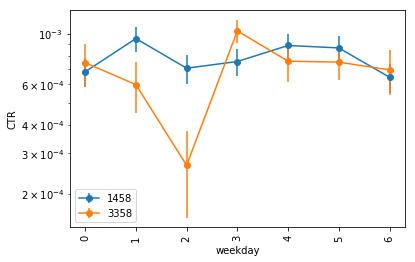

In [172]:
x = weekdays + 1
y1, y2 = ctr_value('weekday')
plot_advertisers(x, y1, y2, 'weekday', line = True)
plt.show()

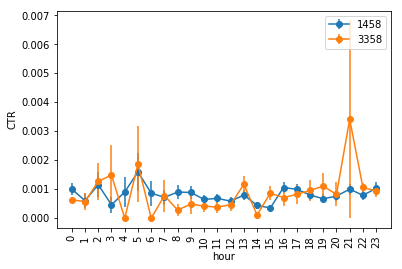

In [158]:
hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = ctr_value('hour')
plot_advertisers(x, y1, y2, 'hour', line = True)
plt.show()

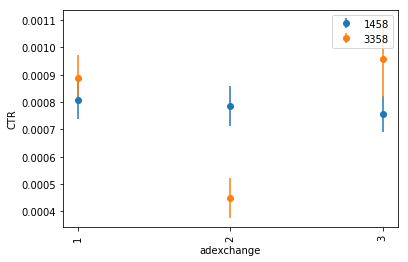

In [159]:
# adexchange = train['adexchange'].unique()
adexchange = train_1458['adexchange'].unique()
adexchange.sort()
x = adexchange
y1, y2 = ctr_value('adexchange')
plot_advertisers(x, y1, y2, 'adexchange', line = False)
plt.show()

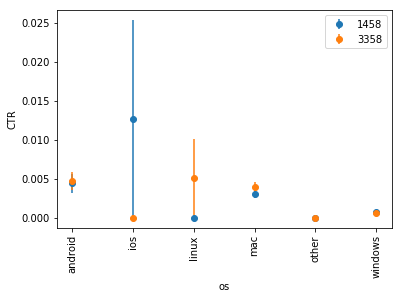

In [160]:
x = train['os'].unique()
x.sort()
y1, y2 = ctr_value('os')
plot_advertisers(x, y1, y2, 'os', line = False)
plt.show()

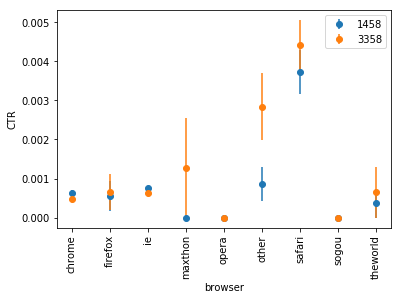

In [161]:
x = train['browser'].unique()
x.sort()
y1, y2 = ctr_value('browser')
plot_advertisers(x, y1, y2, 'browser', line = False)
plt.show()

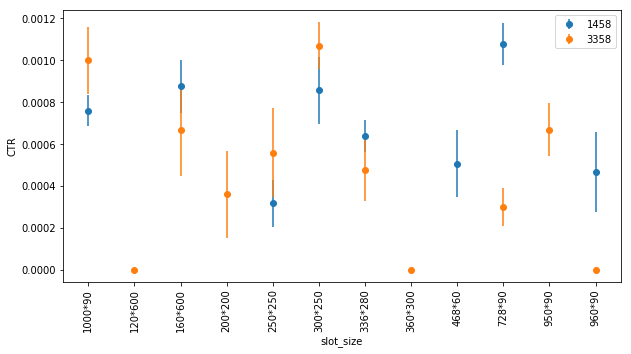

In [162]:
x = train['slot_size'].unique()
x.sort()
y1, y2 = ctr_value('slot_size')
plt.figure(figsize=(10,5))
plot_advertisers(x, y1, y2, 'slot_size', line = False)
plt.show()

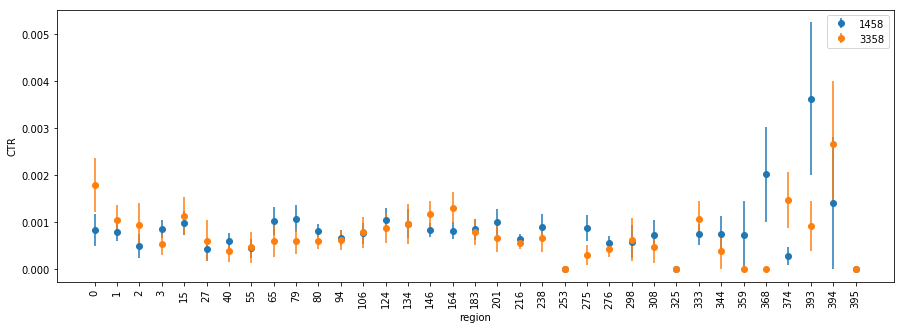

In [188]:
x = train['region'].unique()
x.sort()
y1, y2 = ctr_value('region')
plt.figure(figsize=(15,5))
plot_advertisers(x, y1, y2, 'region', line = False)
plt.show()

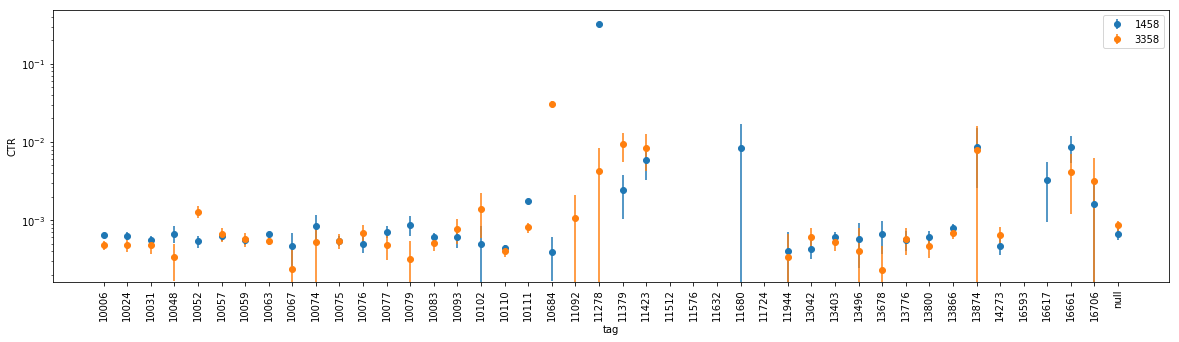

In [173]:
x, y1, y2 = ctr_value_tag()

plt.figure(figsize=(20,5))
plot_advertisers(x, y1, y2, 'tag', line = False)
plt.gca().set_yscale('log')
plt.show()

In [165]:
print(train_3358.shape)
print(train_1458.shape)

(264956, 28)
(492353, 28)


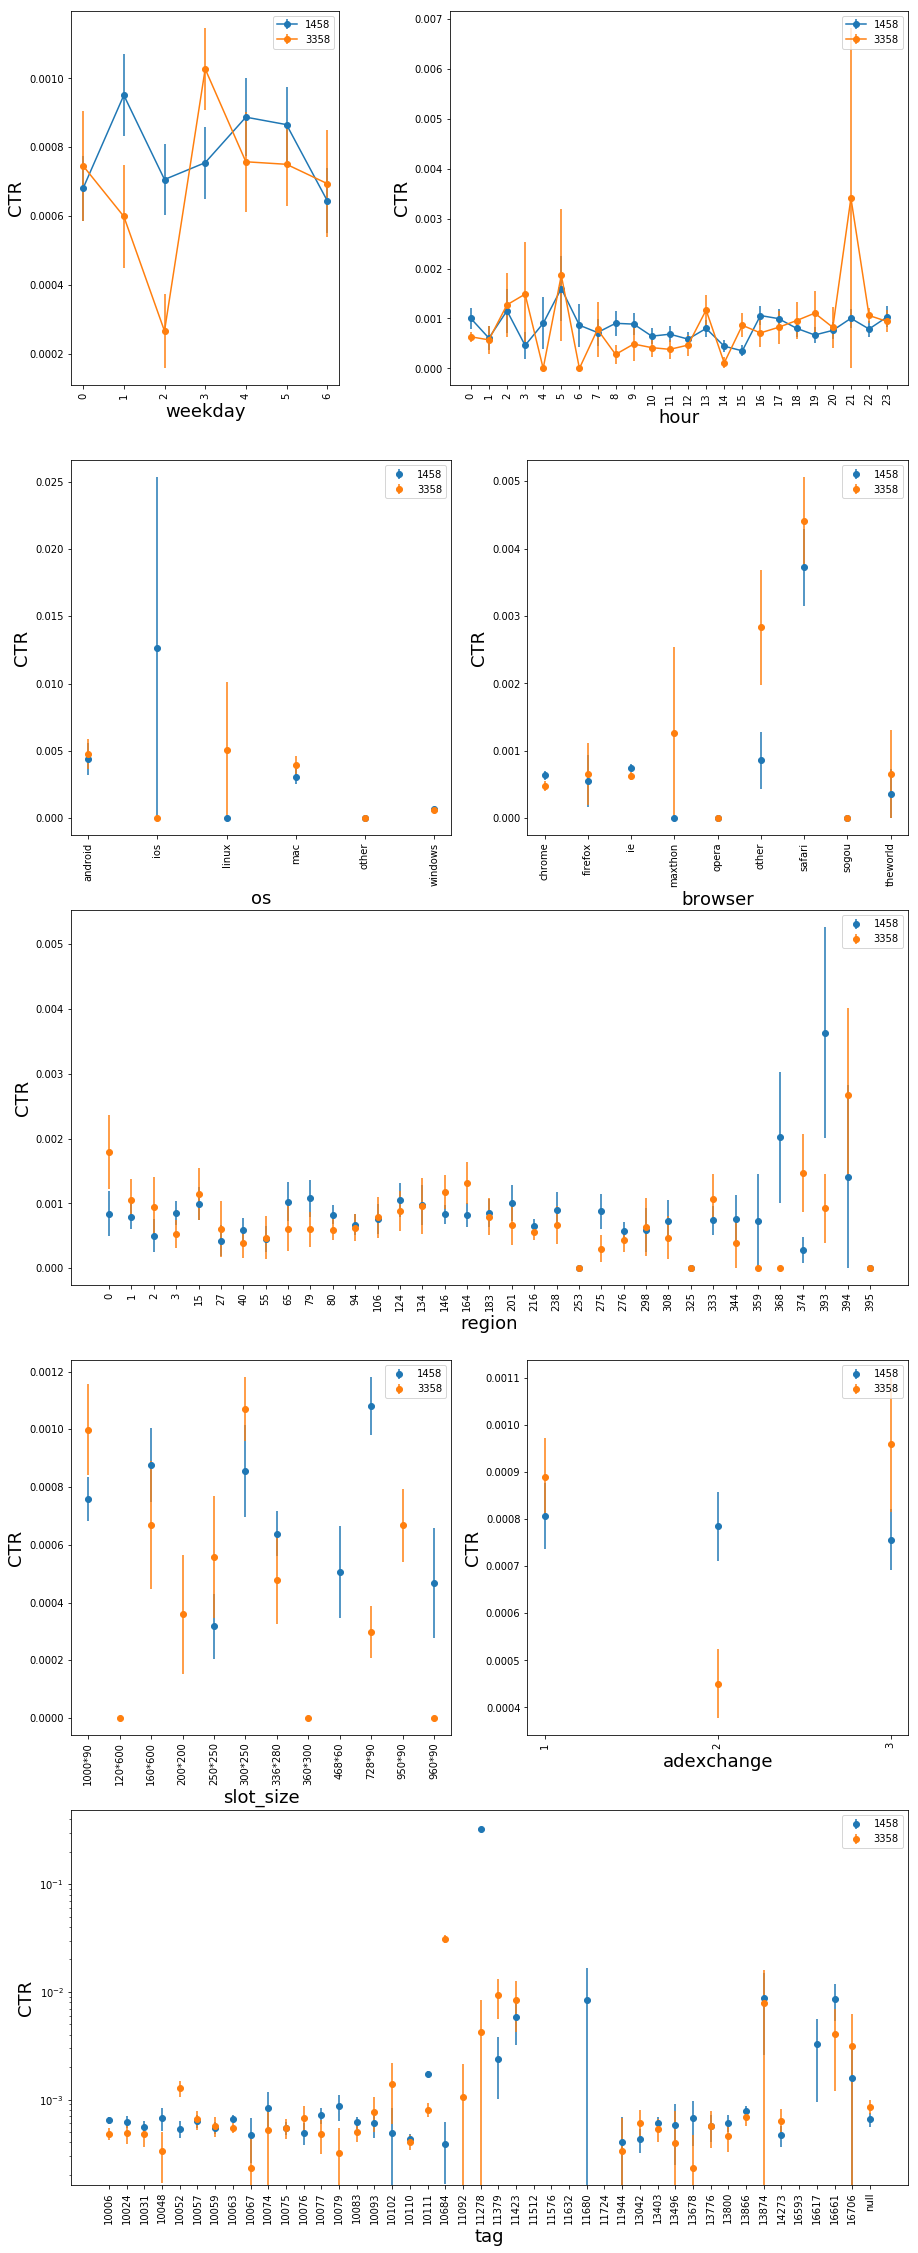

In [227]:
import numpy as np
import matplotlib.pyplot as plt
 
plt.figure(figsize=(15,40))

plt.sca(plt.subplot2grid((5, 9), (0, 0), colspan=3))
x = weekdays + 1
y1, y2 = ctr_value('weekday')
plot_advertisers(x, y1, y2, 'weekday', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)

plt.sca(plt.subplot2grid((5, 9), (0, 4), colspan=5))
hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = ctr_value('hour')
plot_advertisers(x, y1, y2, 'hour', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)

# plt.sca(plt.subplot2grid((2, 2), (1, 0), colspan=2))
plt.sca(plt.subplot2grid((5, 2), (1, 0)))
x = train['os'].unique()
x.sort()
y1, y2 = ctr_value('os')
plot_advertisers(x, y1, y2, 'os', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
    
plt.sca(plt.subplot2grid((5, 2), (1, 1)))
x = train['browser'].unique()
x.sort()
y1, y2 = ctr_value('browser')
plot_advertisers(x, y1, y2, 'browser', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)

plt.sca(plt.subplot2grid((5, 2), (2, 0), colspan=2))
x = train['region'].unique()
x.sort()
y1, y2 = ctr_value('region')
# plt.figure(figsize=(15,5))
plot_advertisers(x, y1, y2, 'region', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
    
plt.sca(plt.subplot2grid((5, 2), (3, 0)))
x = train['slot_size'].unique()
x.sort()
y1, y2 = ctr_value('slot_size')
# plt.figure(figsize=(10,5))
plot_advertisers(x, y1, y2, 'slot_size', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
    
plt.sca(plt.subplot2grid((5, 2), (3, 1)))
adexchange = train_1458['adexchange'].unique()
adexchange.sort()
x = adexchange
y1, y2 = ctr_value('adexchange')
plot_advertisers(x, y1, y2, 'adexchange', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
    
plt.sca(plt.subplot2grid((5, 2), (4, 0), colspan=2))
x, y1, y2 = ctr_value_tag()
# plt.figure(figsize=(20,5))
plot_advertisers(x, y1, y2, 'tag', line = False)
plt.gca().set_yscale('log')
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
plt.savefig('ctr.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

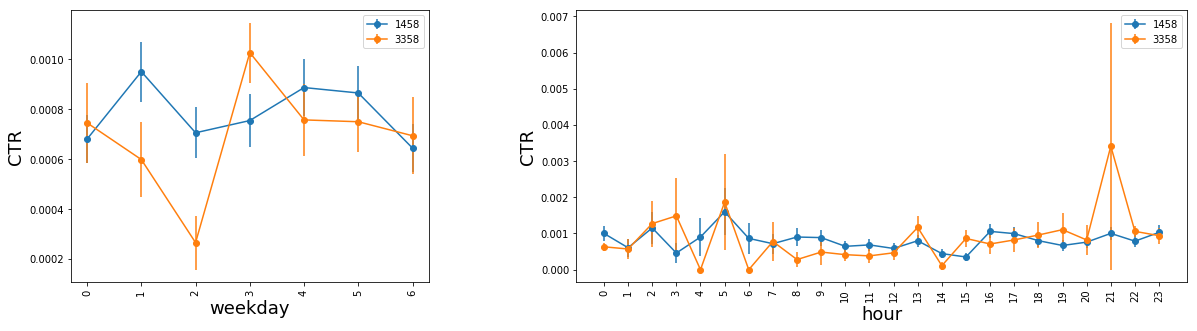

In [229]:
import numpy as np
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,5))

plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=3))
x = weekdays + 1
y1, y2 = ctr_value('weekday')
plot_advertisers(x, y1, y2, 'weekday', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)



plt.sca(plt.subplot2grid((1, 9), (0, 4), colspan=5))
hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = ctr_value('hour')
plot_advertisers(x, y1, y2, 'hour', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)
plt.savefig('12.pdf', pad_inches=0, bbox_inches='tight')
plt.show()


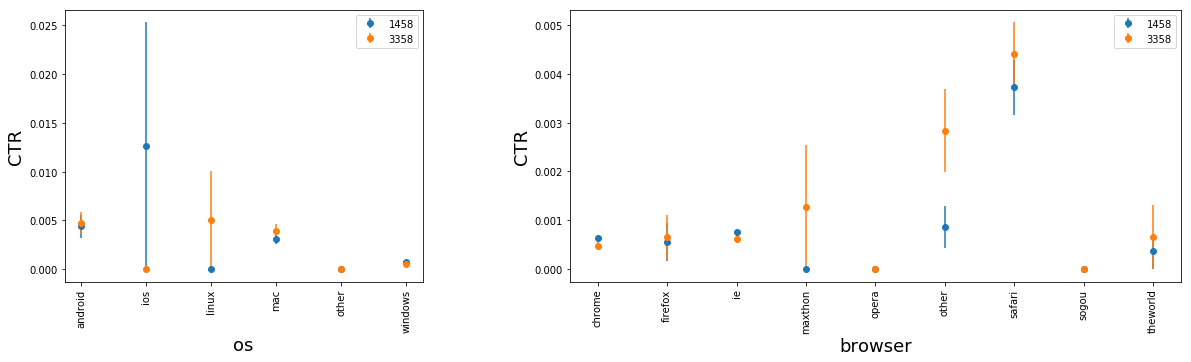

In [247]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))

plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=3))
x = train['os'].unique()
x.sort()
y1, y2 = ctr_value('os')
plot_advertisers(x, y1, y2, 'os', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.sca(plt.subplot2grid((1, 9), (0, 4), colspan=5))
x = train['browser'].unique()
x.sort()
y1, y2 = ctr_value('browser')
plot_advertisers(x, y1, y2, 'browser', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)
# for tick in plt.gca().get_xticklabels():
#     tick.set_size(20)




plt.savefig('22.pdf', pad_inches=0, bbox_inches='tight')
plt.show()


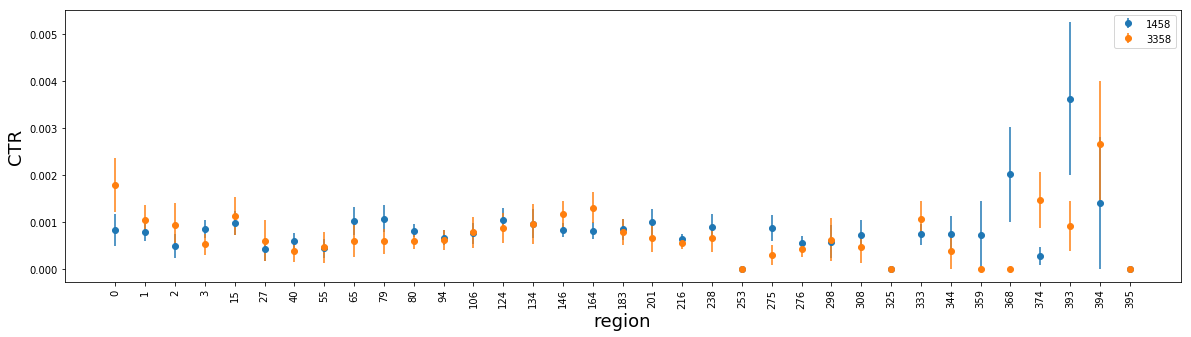

In [236]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))


plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=9))
x = train['region'].unique()
x.sort()
y1, y2 = ctr_value('region')
# plt.figure(figsize=(15,5))
plot_advertisers(x, y1, y2, 'region', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.savefig('31.pdf', pad_inches=0, bbox_inches='tight')
plt.show()


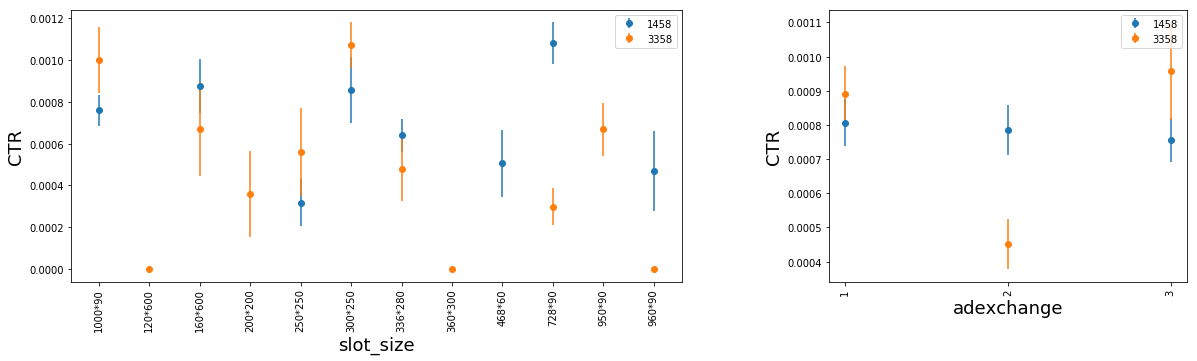

In [242]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))

plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=5))
x = train['slot_size'].unique()
x.sort()
y1, y2 = ctr_value('slot_size')
# plt.figure(figsize=(10,5))
plot_advertisers(x, y1, y2, 'slot_size', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.sca(plt.subplot2grid((1, 9), (0, 6), colspan=3))
adexchange = train_1458['adexchange'].unique()
adexchange.sort()
x = adexchange
y1, y2 = ctr_value('adexchange')
plot_advertisers(x, y1, y2, 'adexchange', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)




plt.savefig('42.pdf', pad_inches=0, bbox_inches='tight')
plt.show()





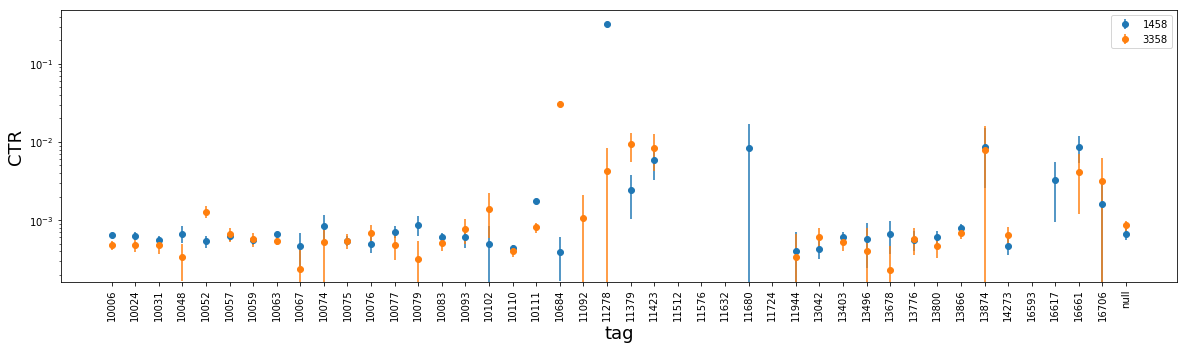

In [243]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))


plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=9))
x, y1, y2 = ctr_value_tag()
# plt.figure(figsize=(20,5))
plot_advertisers(x, y1, y2, 'tag', line = False)
plt.gca().set_yscale('log')
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.savefig('51.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

In [167]:
print('**************************************************************************************************************')

**************************************************************************************************************


In [38]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag,os,browser,slot_size
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null,windows,ie,200*200
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,0,10722,294,23,null,2821,null,windows,chrome,300*250
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110",windows,ie,250*250
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111",windows,ie,160*600
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,133,7330,277,133,null,2259,null,windows,ie,728*90


In [81]:

# price_1458 = train_1458.groupby([x_axis])['payprice'].sum()
# price_1458

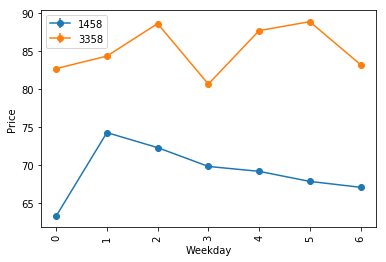

In [111]:
x = weekdays + 1
y1, y2 = price_value('weekday')
plot_advertisers_price(x, y1, y2, 'Weekday', line = True)
plt.show()

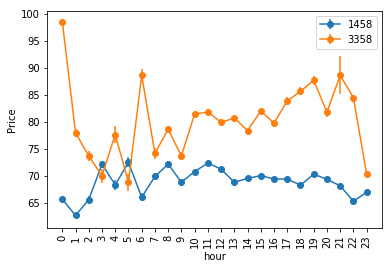

In [112]:
hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = price_value('hour')
plot_advertisers_price(x, y1, y2, 'hour', line = True)
plt.show()

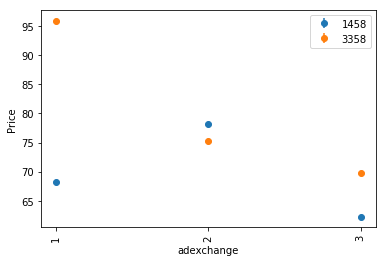

In [113]:
adexchange = train_1458['adexchange'].unique()
adexchange.sort()
x = adexchange
y1, y2 = price_value('adexchange')
plot_advertisers_price(x, y1, y2, 'adexchange', line = False)
plt.show()

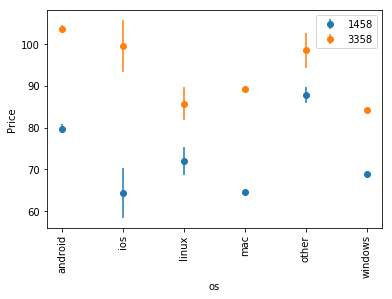

In [114]:
x = train['os'].unique()
x.sort()
y1, y2 = price_value('os')
plot_advertisers_price(x, y1, y2, 'os', line = False)
plt.show()

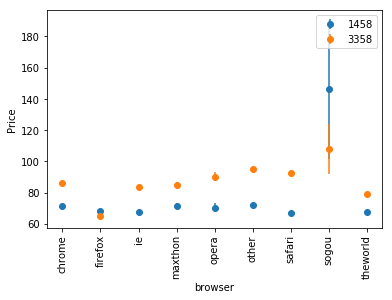

In [115]:
x = train['browser'].unique()
x.sort()
y1, y2 = price_value('browser')
plot_advertisers_price(x, y1, y2, 'browser', line = False)
plt.show()

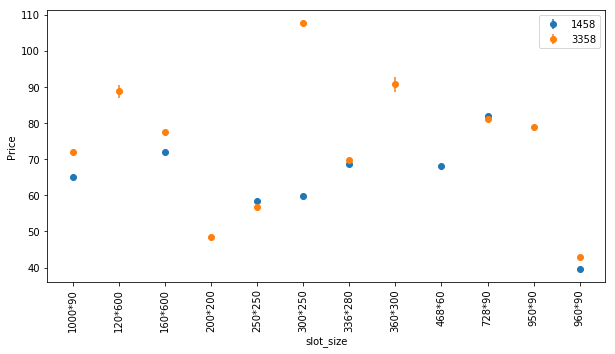

In [116]:
x = train['slot_size'].unique()
x.sort()
y1, y2 = price_value('slot_size')
plt.figure(figsize=(10,5))
plot_advertisers_price(x, y1, y2, 'slot_size', line = False)
plt.show()

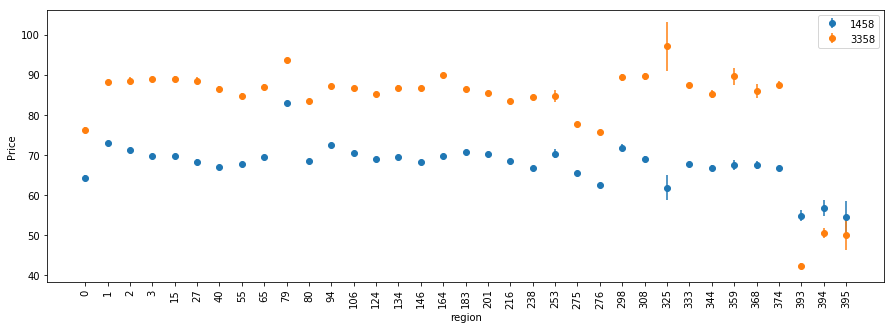

In [117]:
x = train['region'].unique()
x.sort()
y1, y2 = price_value('region')
plt.figure(figsize=(15,5))
plot_advertisers_price(x, y1, y2, 'region', line = False)
plt.show()

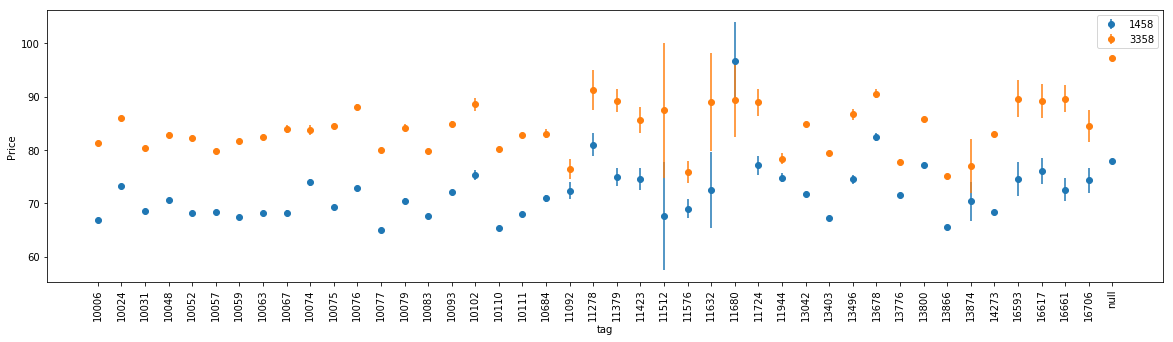

In [118]:
x, y1, y2 = price_value_tag()

plt.figure(figsize=(20,5))
plot_advertisers_price(x, y1, y2, 'tag', line = False)
plt.show()

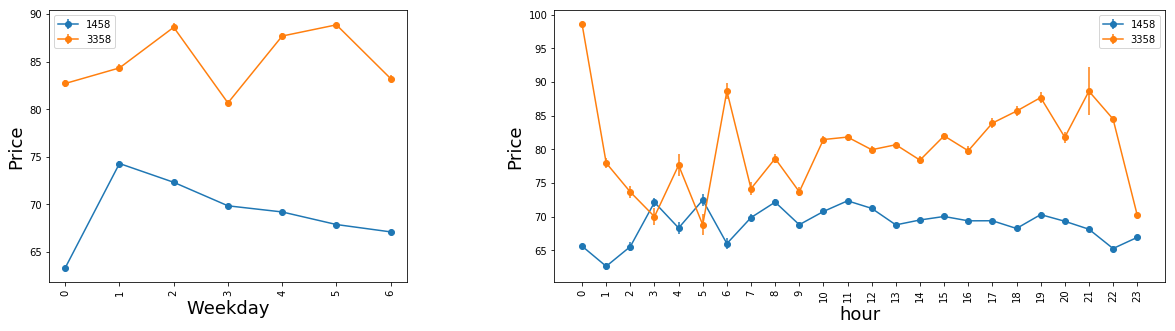

In [245]:
import numpy as np
import matplotlib.pyplot as plt
 
plt.figure(figsize=(20,5))

plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=3))
x = weekdays + 1
y1, y2 = price_value('weekday')
plot_advertisers_price(x, y1, y2, 'Weekday', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)



plt.sca(plt.subplot2grid((1, 9), (0, 4), colspan=5))
hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = price_value('hour')
plot_advertisers_price(x, y1, y2, 'hour', line = True)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.savefig('p12.pdf', pad_inches=0, bbox_inches='tight')
plt.show()


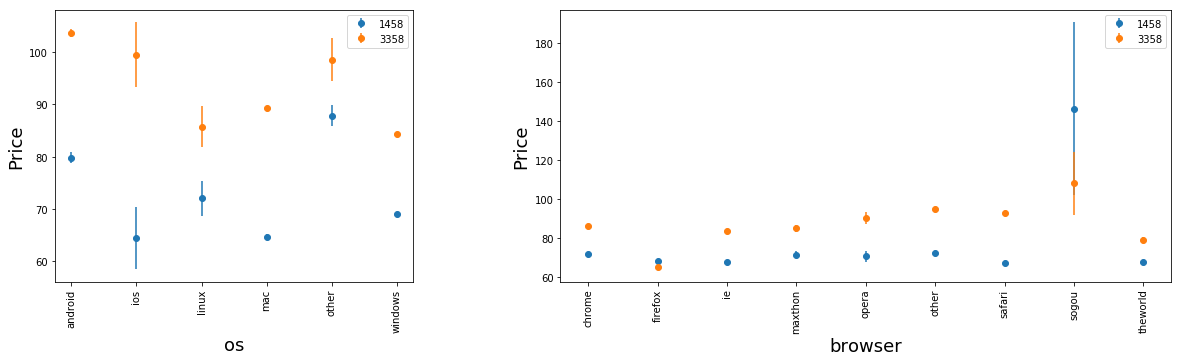

In [248]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))

plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=3))
x = train['os'].unique()
x.sort()
y1, y2 = price_value('os')
plot_advertisers_price(x, y1, y2, 'os', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.sca(plt.subplot2grid((1, 9), (0, 4), colspan=5))
x = train['browser'].unique()
x.sort()
y1, y2 = price_value('browser')
plot_advertisers_price(x, y1, y2, 'browser', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)




plt.savefig('p22.pdf', pad_inches=0, bbox_inches='tight')
plt.show()


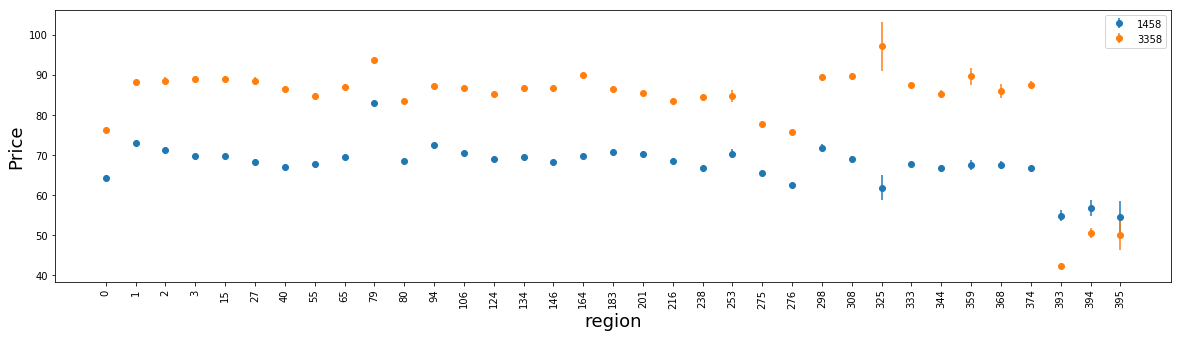

In [251]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))


plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=9))
x = train['region'].unique()
x.sort()
y1, y2 = price_value('region')
# plt.figure(figsize=(15,5))
plot_advertisers_price(x, y1, y2, 'region', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.savefig('p31.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

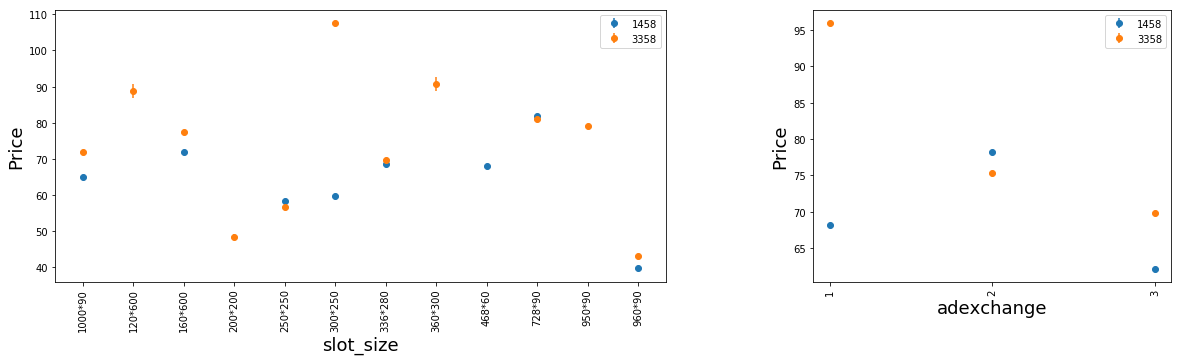

In [254]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))

plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=5))
x = train['slot_size'].unique()
x.sort()
y1, y2 = price_value('slot_size')
# plt.figure(figsize=(10,5))
plot_advertisers_price(x, y1, y2, 'slot_size', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.sca(plt.subplot2grid((1, 9), (0, 6), colspan=3))
adexchange = train_1458['adexchange'].unique()
adexchange.sort()
x = adexchange
y1, y2 = price_value('adexchange')
plot_advertisers_price(x, y1, y2, 'adexchange', line = False)
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)




plt.savefig('p42.pdf', pad_inches=0, bbox_inches='tight')
plt.show()





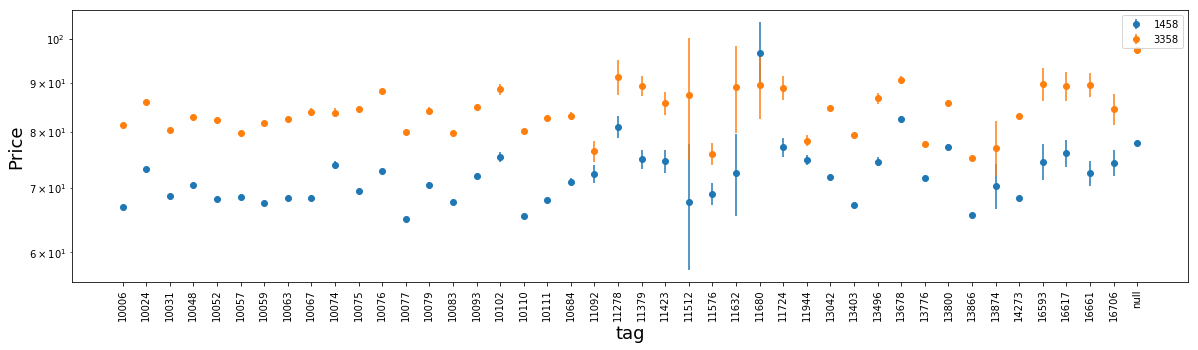

In [255]:
import numpy as np
import matplotlib.pyplot as plt



 
plt.figure(figsize=(20,5))


plt.sca(plt.subplot2grid((1, 9), (0, 0), colspan=9))
x, y1, y2 = price_value_tag()

# plt.figure(figsize=(20,5))
plot_advertisers_price(x, y1, y2, 'tag', line = False)
plt.gca().set_yscale('log')
plt.gca().xaxis.label.set_size(18)
plt.gca().yaxis.label.set_size(18)


plt.savefig('p51.pdf', pad_inches=0, bbox_inches='tight')
plt.show()

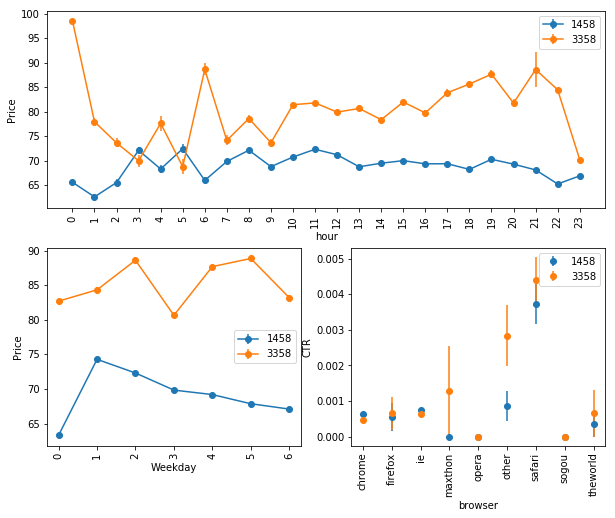

In [128]:
import numpy as np
import matplotlib.pyplot as plt




# df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*2 })
# ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
# ax1.plot( 'x', 'y', data=df, marker='o', alpha=0.4)
# ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
# ax2.plot( 'x','z', data=df, marker='o', color="grey", alpha=0.3)
# ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
# ax3.plot( 'x','z', data=df, marker='o', color="orange", alpha=0.3)

# plt.figure(1)   
plt.figure(figsize=(10,8))

plt.sca(plt.subplot2grid((2, 2), (0, 0), colspan=2))

hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = price_value('hour')
plot_advertisers_price(x, y1, y2, 'hour', line = True)




plt.sca(plt.subplot2grid((2, 2), (1, 1)))
x = train['browser'].unique()
x.sort()
y1, y2 = ctr_value('browser')
plot_advertisers(x, y1, y2, 'browser', line = False)

plt.sca(plt.subplot2grid((2, 2), (1, 0)))
x = weekdays + 1
y1, y2 = price_value('weekday')
plot_advertisers_price(x, y1, y2, 'Weekday', line = True)


plt.show()

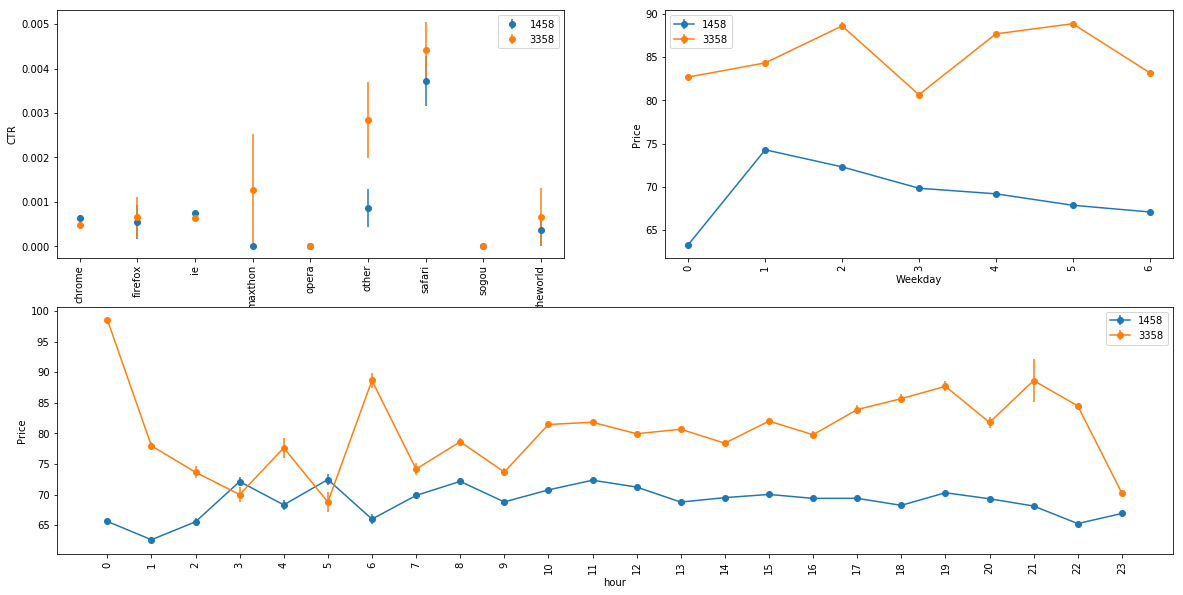

In [137]:
import numpy as np
import matplotlib.pyplot as plt




# df=pd.DataFrame({'x': range(1,101), 'y': np.random.randn(100)*15+range(1,101), 'z': (np.random.randn(100)*15+range(1,101))*2 })
# ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
# ax1.plot( 'x', 'y', data=df, marker='o', alpha=0.4)
# ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
# ax2.plot( 'x','z', data=df, marker='o', color="grey", alpha=0.3)
# ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
# ax3.plot( 'x','z', data=df, marker='o', color="orange", alpha=0.3)

# plt.figure(1)   
plt.figure(figsize=(20,10))



plt.sca(plt.subplot2grid((2, 2), (0, 0)))
x = train['browser'].unique()
x.sort()
y1, y2 = ctr_value('browser')
plot_advertisers(x, y1, y2, 'browser', line = False)

plt.sca(plt.subplot2grid((2, 2), (0, 1)))
x = weekdays + 1
y1, y2 = price_value('weekday')
plot_advertisers_price(x, y1, y2, 'Weekday', line = True)




plt.sca(plt.subplot2grid((2, 2), (1, 0), colspan=2))

hours = train['hour'].unique()
hours.sort()
x = hours
y1, y2 = price_value('hour')
plot_advertisers_price(x, y1, y2, 'hour', line = True)



plt.show()

In [ ]:
validation_explor = dataexploration(validation_df, validation)
validation_df

In [ ]:
#######################################################ERROR#########################################################

# test_explor = dataexploration(test_df, test)
# test_df

In [ ]:
# import matplotlib.pyplot as plt

# import plotly.plotly as py
# # Learn about API authentication here: https://plot.ly/python/getting-started
# # Find your api_key here: https://plot.ly/settings/api

# y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
# N = len(y)
# x = range(N)
# width = 1/1.5
# plt.bar(x, y, width, color="blue")


# fig = plt.gcf()
# plot_url = py.plot_mpl(fig, filename='mpl-basic-bar')

In [ ]:
def evaluate_metrics(bidprices):
    win_items = validation['bidprice'] < bidprices
    imp = validation[win_items]
    print('number of clicks', imp['click'].sum())
    cost = imp['bidprice'].sum() / 1000
    print('total cost', cost)
    avg_CTR = (imp['click'].sum() / imp['click'].count()) * 100
#     Check for CTR
    print('Click through rate ', avg_CTR)
    avg_CPC = cost / imp['click'].sum()
    print('Average CPC', avg_CPC)
    CPM = (cost) / (imp['click'].count()) * 1000
    print('Cost per mille', CPM)

In [ ]:
########################################Constant Bidding###############################################################

In [ ]:
avg_bidprice = train['payprice'].mean()
avg_bidprice

In [ ]:
validation = pd.read_csv('we_data/validation.csv')

In [ ]:
validation.columns

In [ ]:
# Calculate metrics for constant bidding
evaluate_metrics(avg_bidprice)

In [ ]:
########################################Constant Biddin_2#########################################################

In [ ]:
for i in range(0, 300):
    budget = 6250 * 1000
    clicks = 0
    bid_value = i
    for pay, click in zip(train['payprice'], train['click']):
        budget_left = budget - pay
        if bid_value > pay and budget_left >= 0:
            budget = budget_left
            clicks += click
    print(clicks, bid_value, budget)
    

# for i in range(20,100):
#     sum = 6250 * 1000
#     clicks = 0
#     for pay,click in zip(train["payprice"],train['click']):
#         sum_sub = sum - pay
#         bidprice = i
#         if bidprice-pay > 0 and sum_sub >= 0:
#             sum = sum_sub
#             clicks += click
#     print(i, clicks, sum)


In [ ]:
############################################RANDOM BIDDING ##########################################################

In [ ]:
#########################################Random bidding 2###############################################

In [ ]:
# Random Bidding 
max_bid = validation['bidprice'].max()
min_bid = validation['bidprice'].min()
print('Max bid is', max_bid)
print('Min bid is', min_bid)

In [ ]:
rand_vec = np.random.uniform(low=min_bid, high=max_bid, size=(validation['bidprice'].count(),))
print('Length of random bid vector is',len(rand_vec))
print('The number of impressions are', validation['bidprice'].count())

In [ ]:
evaluate_metrics(rand_vec)